# Import data


In this notebook, we look at import functions and how to assign data to the grid. 

---

We import the class: 

In [1]:
#from grid import *

# or:

config_file = "../code/grid.py"
with open(config_file) as f:
    code = compile(f.read(), config_file, 'exec')
    exec(code, globals(), locals())

Now we make two grid objects, one of the Antarctic continent in  [EPSG:3031. WGS 84 / Antarctic Polar Stereographic projection](https://epsg.io/3031) and also a global model, using [WGS84](https://epsg.io/4326). Resolution is defined in the unit of the projection, meters for stereographic projection, and degrees for the global grid. The coordinates in the xarray dataset are stored as dask arrays, they are not loaded until they are needed. When processed, they are loaded as smaller chunks, 1/10 of the axes large. 

In [2]:
#Continental
ant = Grid(res = [10*km, 10*km], left = -3100*km, up=3100*km, right = 3100*km, down = -3100*km)

print(ant.ds)

#Global (almost)
world = Grid(crs_tgt=4326, res = [1, 1], left = -180, up=90, right = 180, down = -90)

print(world.ds)

<xarray.Dataset>
Dimensions:  (RGB: 3, X: 620, Y: 620, Z: 5)
Coordinates:
  * X        (X) float32 -3100000.0 -3089983.8 ... 3089983.8 3100000.0
  * Y        (Y) float32 3100000.0 3089983.8 3079967.8 ... -3089983.8 -3100000.0
  * Z        (Z) float32 0.0 8000.0 16000.0 40000.0 350000.0
  * RGB      (RGB) <U1 'R' 'G' 'B'
    XV       (Y, X) float32 dask.array<shape=(620, 620), chunksize=(62, 62)>
    YV       (Y, X) float32 dask.array<shape=(620, 620), chunksize=(62, 62)>
    lat      (Y, X) float32 dask.array<shape=(620, 620), chunksize=(62, 62)>
    lon      (Y, X) float32 dask.array<shape=(620, 620), chunksize=(62, 62)>
Data variables:
    *empty*
<xarray.Dataset>
Dimensions:  (RGB: 3, X: 360, Y: 180, Z: 5)
Coordinates:
  * X        (X) float32 -180.0 -178.99721 -177.99443 ... 178.99721 180.0
  * Y        (Y) float32 90.0 88.994415 87.98883 ... -87.98883 -88.994415 -90.0
  * Z        (Z) float32 0.0 8000.0 16000.0 40000.0 350000.0
  * RGB      (RGB) <U1 'R' 'G' 'B'
    XV       (Y, X

We download a raster, in this case the global 1:50m Bathymetry. It is 66Mb. 

In [3]:
! mkdir -p ../../data/ne
! wget -nc https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/raster/HYP_50M_SR_W.zip \
    -O ../../data/ne/HYP_50M_SR_W.zip
    
! unzip -n ../../data/ne/HYP_50M_SR_W.zip -d ../../data/ne

File ‘../../data/ne/HYP_50M_SR_W.zip’ already there; not retrieving.
Archive:  ../../data/ne/HYP_50M_SR_W.zip


We import the raster to the global grid and to the Antarctic grid: 
The raster has three channels, so we assign it to X, Y and RGB coordinates. This might also take some time, as the raster needs to be warped to each grid. We can speed up a bit by subsampling the raster before warp. 

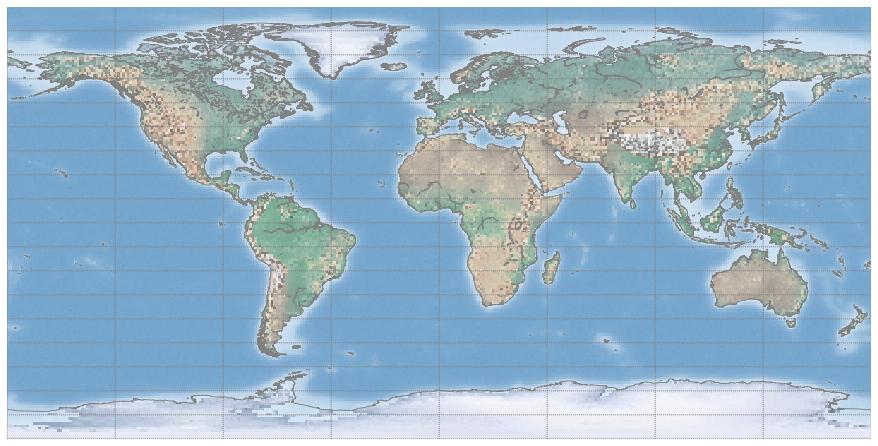

In [4]:
world.ds['RGB_RASTER'] = (('Y', 'X', 'RGB'), 
                world.read_raster('../../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif', sub_sampling=5))

world.map_grid('RGB_RASTER')


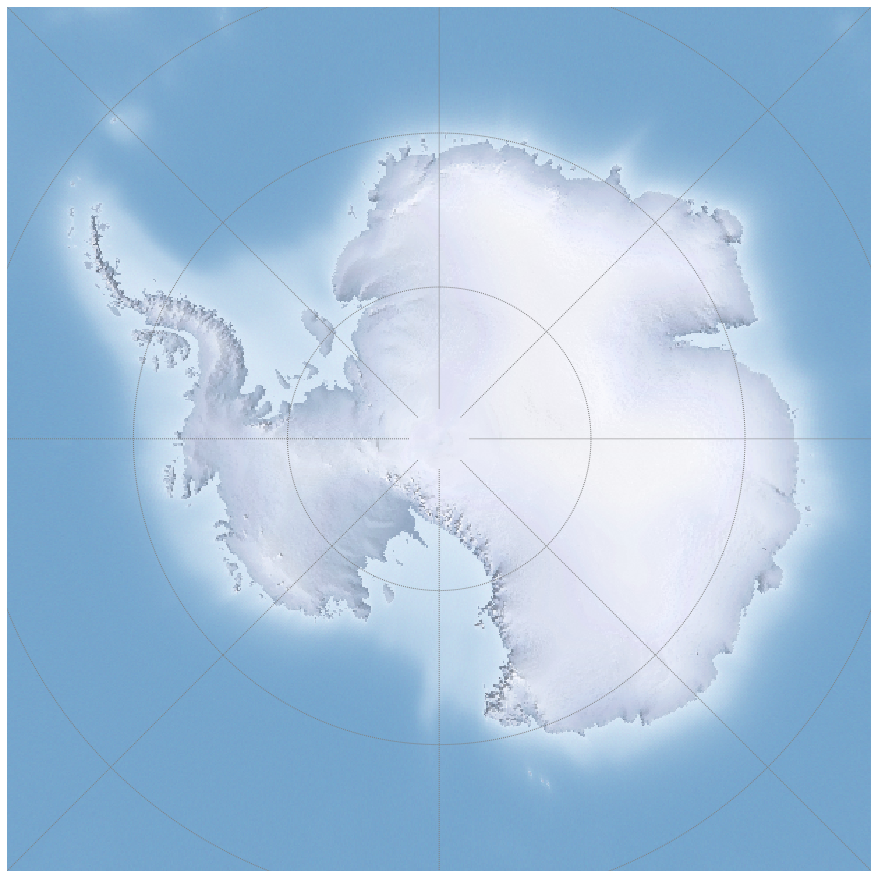

In [5]:
ant.ds['RGB_RASTER'] = (('Y', 'X', 'RGB'), 
                ant.read_raster('../../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif', sub_sampling=4) )

ant.map_grid('RGB_RASTER', draw_coast=False)

Pretty, but the raison d'etre for this code is to work properly in 3D. We download AN-1S sesimic 3D model of the Antarctic lithosphere. 

In [6]:
! mkdir -p ../../data/an
! wget -nc http://www.seismolab.org/model/antarctica/lithosphere/AN1-S_depth_grd.tar.gz \
    -O ../../data/an/AN1-S_depth_grd.tar.gz
! tar -xvzf ../../data/an/AN1-S_depth_grd.tar.gz -C ../../data/an/

File ‘../../data/an/AN1-S_depth_grd.tar.gz’ already there; not retrieving.
x AN1-S_hslice_000.0.grd
x AN1-S_hslice_002.5.grd
x AN1-S_hslice_005.0.grd
x AN1-S_hslice_007.5.grd
x AN1-S_hslice_010.0.grd
x AN1-S_hslice_012.5.grd
x AN1-S_hslice_015.0.grd
x AN1-S_hslice_017.5.grd
x AN1-S_hslice_020.0.grd
x AN1-S_hslice_025.0.grd
x AN1-S_hslice_030.0.grd
x AN1-S_hslice_035.0.grd
x AN1-S_hslice_040.0.grd
x AN1-S_hslice_045.0.grd
x AN1-S_hslice_050.0.grd
x AN1-S_hslice_055.0.grd
x AN1-S_hslice_060.0.grd
x AN1-S_hslice_065.0.grd
x AN1-S_hslice_070.0.grd
x AN1-S_hslice_075.0.grd
x AN1-S_hslice_080.0.grd
x AN1-S_hslice_085.0.grd
x AN1-S_hslice_090.0.grd
x AN1-S_hslice_095.0.grd
x AN1-S_hslice_100.0.grd
x AN1-S_hslice_105.0.grd
x AN1-S_hslice_110.0.grd
x AN1-S_hslice_115.0.grd
x AN1-S_hslice_120.0.grd
x AN1-S_hslice_125.0.grd
x AN1-S_hslice_130.0.grd
x AN1-S_hslice_135.0.grd
x AN1-S_hslice_140.0.grd
x AN1-S_hslice_145.0.grd
x AN1-S_hslice_150.0.grd
x AN1-S_hslice_155.0.grd
x AN1-S_hslice_160.0.grd


In [13]:
import glob

an_files = sorted(glob.glob('../../data/an/*.grd'))
#print(an_files)
ant.ds.coords['AN_Z'] = [np.float32(d[-9:-4])*km for d in an_files]
str_depths = [str(d[-9:-4]) for d in an_files]


an_array = np.empty((ant.nx, ant.ny, len(an_files)))
an_array[:] = np.nan
for i, a in enumerate(ant.ds.coords['AN_Z'].values):
    print(a//km, end=' ')
    fname = '../../data/an/AN1-S_hslice_%s.grd'%str_depths[i]
    if os.path.isfile(fname):
        an_array[:,:,i] = ant.read_grid(fname, xyz = ('x','y','z') ) 
    
ant.ds['AN_S'] = (('X', 'Y', 'AN_Z'), an_array)


-0.0 

/Users/tobiasstal/anaconda3/lib/python3.6/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


2.0 5.0 7.0 10.0 12.0 15.0 17.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 55.0 60.0 65.0 70.0 75.0 80.0 85.0 90.0 95.0 100.0 105.0 110.0 115.0 120.0 125.0 130.0 135.0 140.0 145.0 150.0 155.0 160.0 165.0 170.0 180.0 190.0 200.0 210.0 220.0 230.0 240.0 250.0 275.0 300.0 325.0 350.0 

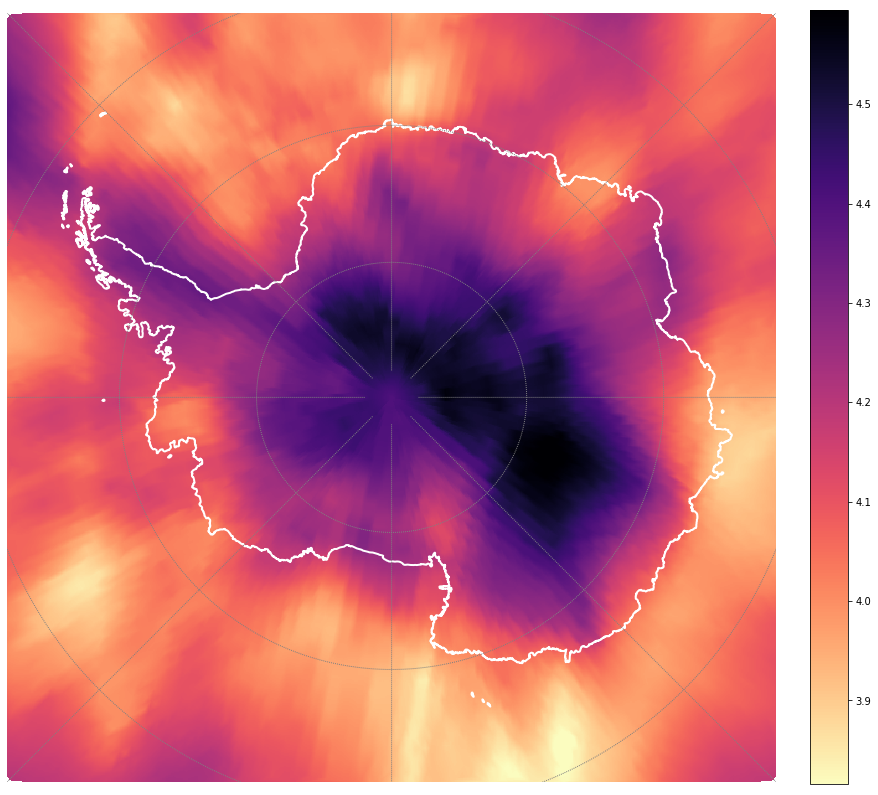

In [20]:
ant.map_grid(ant.ds['AN_S'].sel(AN_Z=200*km), cmap='magma_r', line_w=2, line_c='w', cbar=True)

In [ ]:
! mkdir -p data/raster
! wget -nc https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/raster/GRAY_LR_SR_W.zip \
    -O data/raster/GRAY_LR_SR_W.zip
! unzip -n data/raster/GRAY_LR_SR_W.zip -d data/raster


## A detailed map

Now we try a high resolution dataset with a different projection. 

Again, we download some data, both raster and vector. Ref: [Norwegian Polar Institute 2014](https://data.npolar.no/dataset/19700322-beab-40e7-b867-c3f0c2756071)

Basemap is used to produce maps from the grid, it supports a [large range](https://matplotlib.org/basemap/users/mapsetup.html) of projections, but not all. [epsg 32731](https://epsg.io/32731) is not supported, but we can always use standard matplotlib or mayavi as the grid is regularly sampled. 

In [ ]:
#Make object
bouvet = Grid(crs_tgt=32731, res = [5, 5], 
             up = 3974168, 
             left=517217 , 
             down = 3965208, 
             right = 529277)

print(bouvet.ds)

In [ ]:
! mkdir -p ../../data/bouvet

! wget -nc https://publicdatasets.data.npolar.no/kartdata/NP_B0_DTM20.zip \
    -O ../../data/bouvet/NP_B0_DTM20.zip 
! unzip -n ../../data/bouvet/NP_B0_DTM20.zip -d ../../data/bouvet

! wget -nc https://publicdatasets.data.npolar.no/kartdata/NP_B20_SHP.zip \
    -O ../../data/bouvet/NP_B20_SHP.zip
! unzip -n ../../data/bouvet/NP_B20_SHP.zip -d ../../data/bouvet

! wget -nc https://content.satimagingcorp.com/static/galleryimages/landsat%208%20bouvet%20island%20lg.jpg \
    -O ../../data/bouvet/landsat_bouvet.jpg

In [ ]:
bouvet.ds['DEM'] = (('Y', 'X'), 
                bouvet.read_raster('../../data/bouvet/NP_B0_DTM20/B0_DTM20.tif'))



In [ ]:
bouvet.ds['LAND'] = (('Y', 'X'), 
                     bouvet.assign_shape('../../data/bouvet/NP_B20_SHP/B20_Land_f.shp', None, burn_val=1) )

In [ ]:
plt.imshow(bouvet.ds['LAND'].values)
plt.show()

plt.imshow(bouvet.ds['DEM'].values)
plt.show()
bouvet.ds['DEM'][:,1222]